<a href="https://colab.research.google.com/github/YopaNelly/cd0385-project-starter/blob/main/Copy_of_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
! sudo mkdir -p /root/.kaggle
! sudo touch /root/.kaggle/kaggle.json
! sudo chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
import os
kaggle_username = "yopanelly"
kaggle_key = "0ff208b9c41cdf8c9491dd5d447b73eb"

# Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))
home_dir = os.path.expanduser("~")
kaggle_dir = os.path.join(home_dir, ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.head()
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
# predictor = TabularPredictor(?).fit(?)
predictor = TabularPredictor(label='count',
                             eval_metric='root_mean_squared_error',
                             learner_kwargs={'ignored_columns': ['casual', 'registered']},
                             quantile_levels=None)
predictor.fit(train, time_limit=600)


No path specified. Models will be saved in: "AutogluonModels/ag-20240505_234142"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240505_234142"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 1

[1000]	valid_set's rmse: 136.065


	-135.958	 = Validation score   (-root_mean_squared_error)
	6.78s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 585.35s of the 585.33s of remaining time.
	-134.0804	 = Validation score   (-root_mean_squared_error)
	1.12s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 584.09s of the 584.07s of remaining time.
	-122.0128	 = Validation score   (-root_mean_squared_error)
	15.32s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 567.37s of the 567.35s of remaining time.
	-134.2362	 = Validation score   (-root_mean_squared_error)
	7.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 559.42s of the 559.4s of remaining time.
	-128.4294	 = Validation score   (-root_mean_squared_error)
	7.98s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: Neura

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsDist  -92.442085  root_mean_squared_error       0.038690   0.081363                0.038690           0.081363            1       True          2
1   WeightedEnsemble_L2  -92.442085  root_mean_squared_error       0.039520   0.110659                0.000830           0.029295            2       True         12
2        KNeighborsUnif -109.739422  root_mean_squared_error       0.042004   6.973278                0.042004           6.973278            1       True          1
3       RandomForestMSE -122.012844  root_mean_squared_error       0.158383  15.322900                0.158383          15.322900            1       True          5
4         ExtraTreesMSE -128.429416  root_mean_squared_error       0.188058   7.981000                0.188058   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -109.73942190555698,
  'KNeighborsDist': -92.44208479870365,
  'LightGBMXT': -135.95803375936984,
  'LightGBM': -134.0804268849742,
  'RandomForestMSE': -122.01284447953923,
  'CatBoost': -134.23616330181272,
  'ExtraTreesMSE': -128.42941608551303,
  'NeuralNetFastAI': -136.6138313154035,
  'XGBoost': -135.7689524728067,
  'NeuralNetTorch': -139.15961541534176,
  'LightGBMLarge': -132.1735605846617,
  'WeightedEnsemble_L2': -92.44208479870365},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': ['KNe

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)

predictions.head()

0    51.861626
1    56.686295
2    59.077763
3    60.468830
4    61.419930
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      135.819412
std       132.525269
min         3.424214
25%        23.827692
50%        71.032265
75%       203.938919
max       537.853882
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
negative_values = predictions[predictions <= 0]
num_negative_values = len(negative_values)
num_negative_values


0

In [ ]:
# Set them to zero
predictions[predictions <= 0] = 0


### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 116kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-05-05 23:45:48  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 22:21:04  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 22:14:39  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 19:54:20  first raw submission               complete  1.86412      1.86412       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

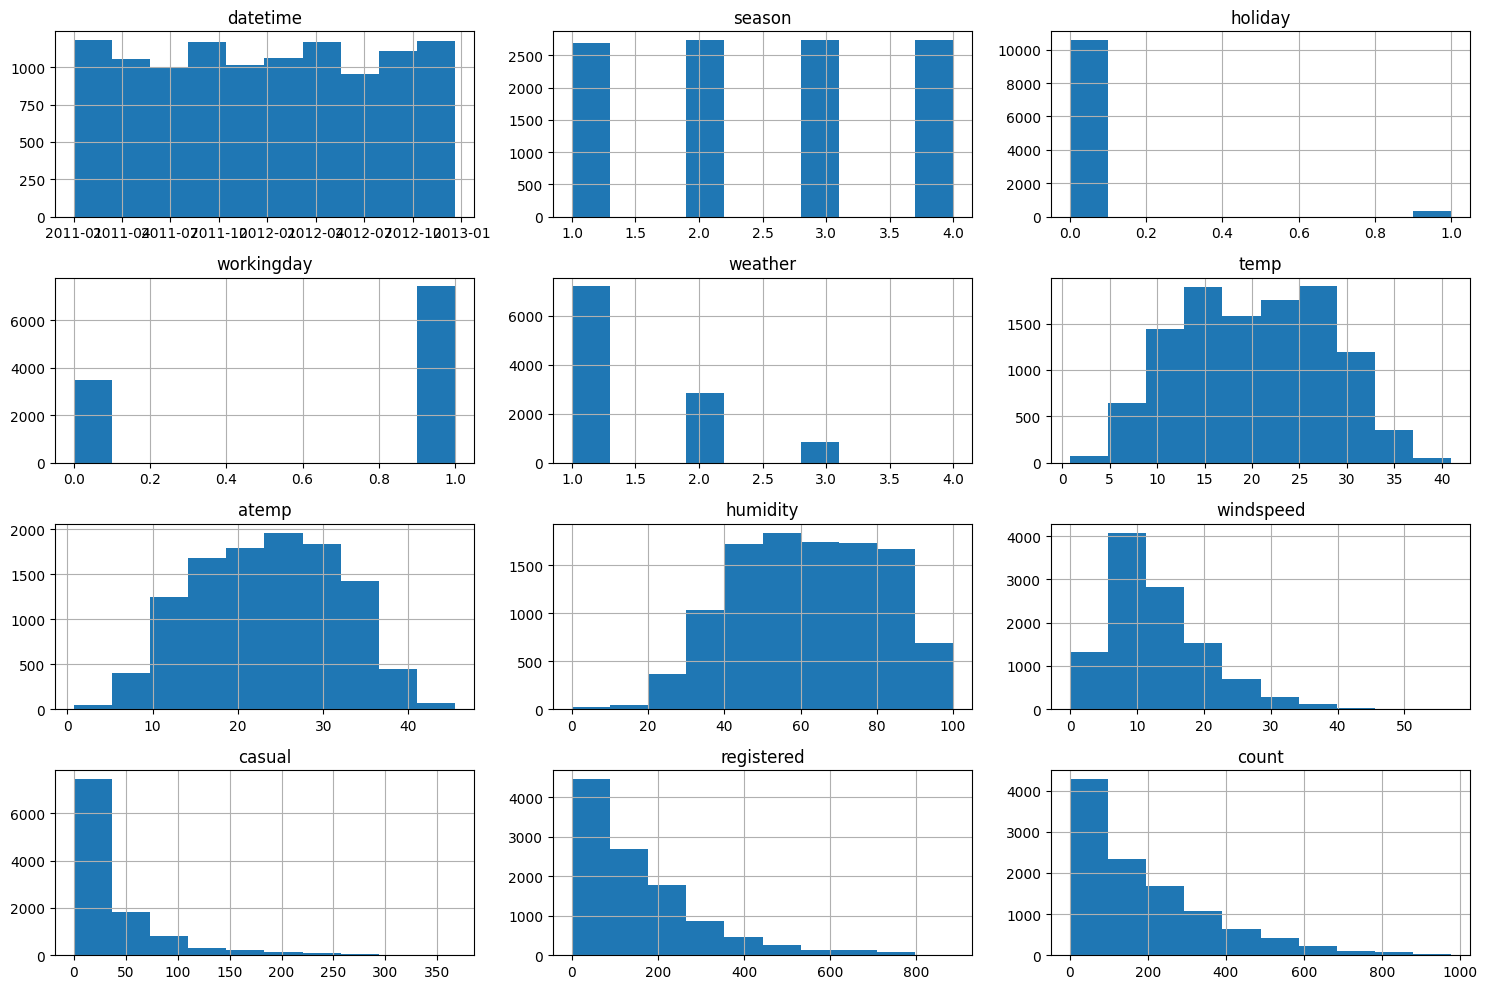

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
import matplotlib.pyplot as plt

train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# # create a new feature
# Convert 'datetime' column to datetime type
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# Now create the new feature 'hour'
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


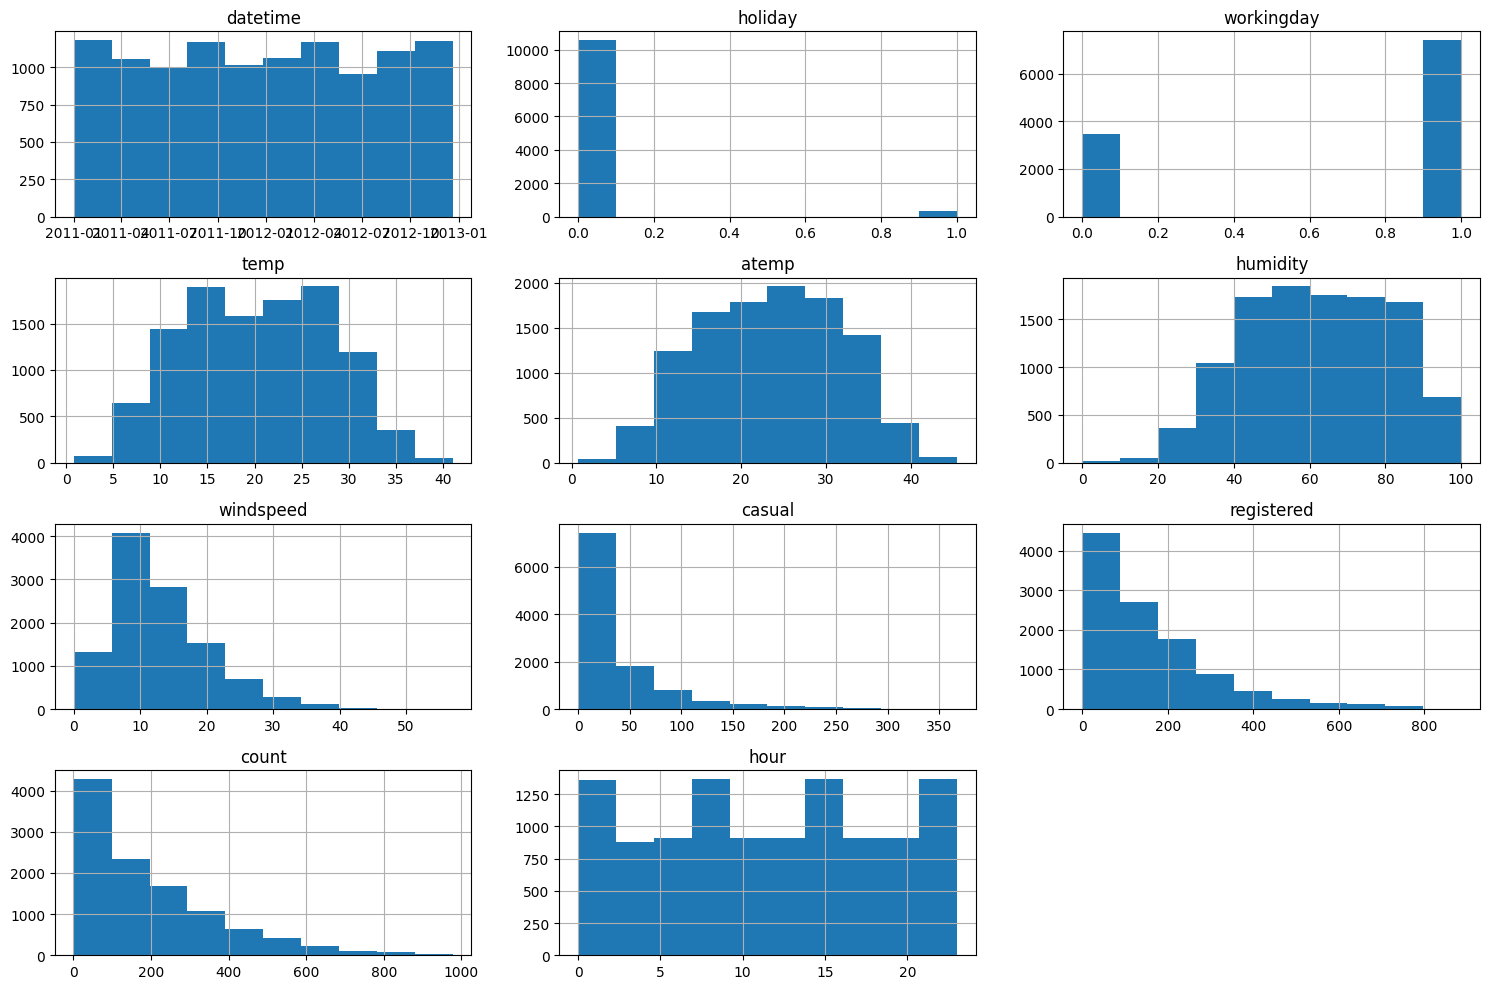

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# predictor_new_features = TabularPredictor(?).fit(?)

# Specify the label column
label = 'count'

# Train the predictor with evaluation metric specified
predictor_new_features = TabularPredictor(label=label,
                                          eval_metric='root_mean_squared_error').fit(train_data=train,
                                                                                     time_limit=600,
                                                                                     presets='best_quality')


No path specified. Models will be saved in: "AutogluonModels/ag-20240505_234913"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240505_234913/ds_sub_fit/sub_fit_ho.
/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. o

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2   -2.101064  root_mean_squared_error      46.214761  372.551509                0.001513           0.067915            2       True          8
1    ExtraTreesMSE_BAG_L1   -2.621565  root_mean_squared_error       1.008835   10.002658                1.008835          10.002658            1       True          7
2  RandomForestMSE_BAG_L1   -2.830180  root_mean_squared_error       0.829634   19.839411                0.829634          19.839411            1       True          5
3         LightGBM_BAG_L1   -3.143934  root_mean_squared_error       5.718681   58.962061                5.718681          58.962061            1       True          4
4         CatBoost_BAG_L1   -3.274475  root_mean_squared_error       0.222251  116.958715         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -4.579351531927511,
  'LightGBM_BAG_L1': -3.1439335044697683,
  'RandomForestMSE_BAG_L1': -2.830180073667178,
  'CatBoost_BAG_L1': -3.2744749811438885,
  'ExtraTreesMSE_BAG_L1': -2.6215649694199006,
  'WeightedEnsemble_L2': -2.101063923779198},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  'LightGBMXT_BAG

In [ ]:
# Remember to set all negative values to zero
test['casual'] = 0
test['registered'] = 0

# Generate predictions from the modified test dataset
predictions_new_features = predictor_new_features.predict(test)

# Set negative predictions to zero
predictions_new_features[predictions_new_features < 0] = 0



In [ ]:
predictions = predictor_new_features.predict(test)

submission_new_features = test[['datetime']].copy()
submission_new_features.loc[:, 'count'] = predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 189k/189k [00:01<00:00, 104kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-06 00:04:12  new features                       complete  3.63692      3.63692       
submission.csv               2024-05-06 00:00:03  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 23:45:48  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 22:21:04  first raw submission               complete  1.86412      1.86412       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
# Define the label column
label = 'count'

# Define hyperparameters for each model
hyperparameters = {
    'GBM': {'num_boost_round': 100, 'learning_rate': 0.1, 'num_leaves': 31},
    'RF': {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2},
    'CAT': {'iterations': 100, 'learning_rate': 0.1, 'depth': 6},
    'XGB': {'num_boost_round': 100, 'eta': 0.1, 'max_depth': 6}
}

hyperparameter_tune_kwargs = {
    'scheduler': 'local',
    'searcher': 'bayesopt',
    'num_trials': 10,
}



# Initialize the predictor
predictor_new_hpo = TabularPredictor(label=label)

# Fit the predictor with hyperparameter optimization
predictor_new_hpo.fit(train_data=train, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)


No path specified. Models will be saved in: "AutogluonModels/ag-20240506_001412"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240506_001412"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
C

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2  -3.071600  root_mean_squared_error       0.135278  7.969725                0.000933           0.003871            2       True          2
1         RandomForest  -3.625213  root_mean_squared_error       0.134346  7.965854                0.134346           7.965854            1       True          1
Number of models trained: 2
Types of models trained:
{'WeightedEnsembleModel', 'RFModel'}
Bagging used: False 
Multi-layer stack-ensembling used: False 
Feature Metadata (Processed):
(raw dtype, special dtypes):
('category', [])             : 2 | ['season', 'weather']
('float', [])                : 3 | ['temp', 'atemp', 'windspeed']
('int', [])                  : 4 | ['humidity', 'casual', 'registered', 'hour']
('int', ['bool'])            : 2 | ['

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest': 'RFModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest': -3.6252128698956803,
  'WeightedEnsemble_L2': -3.0716000105205157},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest': ['RandomForest'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'RandomForest': 7.965854167938232,
  'WeightedEnsemble_L2': 0.0038709640502929688},
 'model_pred_times': {'RandomForest': 0.13434553146362305,
  'WeightedEnsemble_L2': 0.0009326934814453125},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'RandomForest': {'n_estimators': 100,
   'max_leaf_nodes': 15000,
   'n_jobs': -1,
   'random_state': 0,
   'bootstrap': True,
   'max_depth': 10,
   'min_samples_split': 2},
  'WeightedEnsemble_L2': {'use_orig_features': False,
   'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True}},
 'leaderboard':                  model  score_val           

In [ ]:
# Remember to set all negative values to zero
test_predictions = predictor_new_hpo.predict(test)

# Set all negative values to zero
test_predictions[test_predictions < 0] = 0

In [ ]:
# Same submitting predictions
submission["datetime"] = test["datetime"]
# Clip negative predictions to zero
submission["count"] = test_predictions.clip(lower=0)
submission.to_csv("submission_new_hpo.csv", index=False)


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 190k/190k [00:01<00:00, 115kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-06 00:28:44  new features with hyperparameters  complete  4.08889      4.08889       
submission_new_features.csv  2024-05-06 00:04:12  new features                       complete  3.63692      3.63692       
submission.csv               2024-05-06 00:00:03  first raw submission               complete  1.86412      1.86412       
submission.csv               2024-05-05 23:45:48  first raw submission               complete  1.86412      1.86412       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

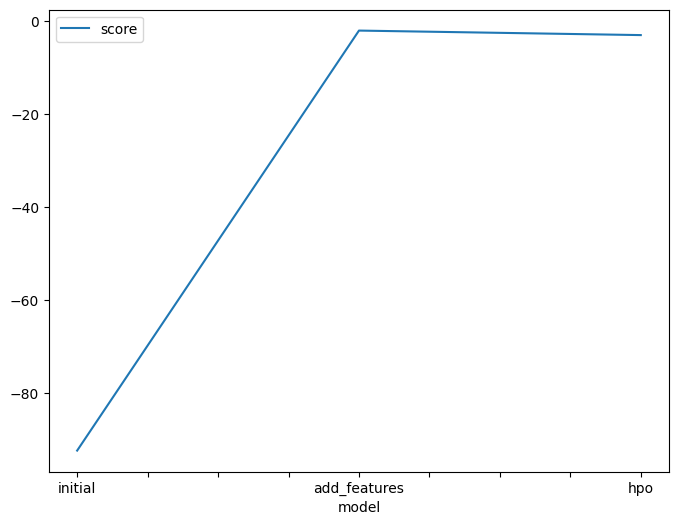

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-92.442085, -2.101064 , -3.071600]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

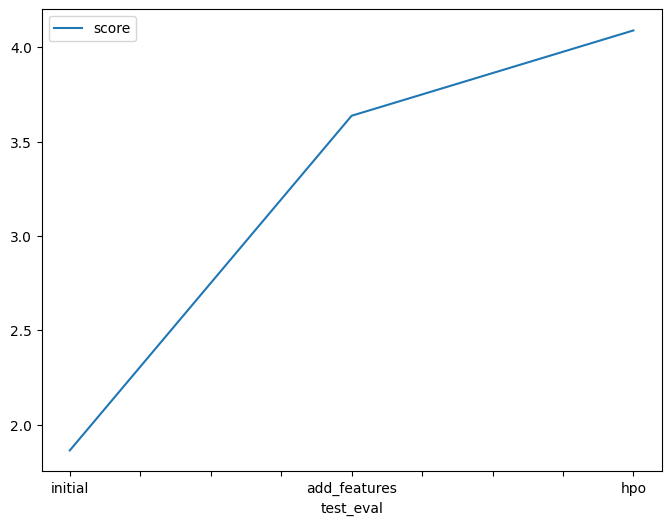

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.86412 , 3.63692 , 4.08889]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:

# The 3 hyperparameters we tuned with the kaggle score as the result
hyperparameters = {
    "initial": {"learning_rate": 0.05, "num_boost_round": 100, "feature_fraction": 1.0, "min_data_in_leaf": 20, "num_leaves": 31},
    "add_features": {"learning_rate": 0.06994332504138304, "num_boost_round": 100, "feature_fraction": 0.8872033759818312, "min_data_in_leaf": 5, "num_leaves": 83},
    "hpo": {"learning_rate": 0.04988344687833528, "num_boost_round": 100, "feature_fraction": 0.9618129346960314, "min_data_in_leaf": 52, "num_leaves": 52}
}

kaggle_scores = {
    "initial": 1.86412,
    "add_features": 3.65413,
    "hpo": 3.39851
}

df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [hyperparameters["initial"]["learning_rate"], hyperparameters["add_features"]["learning_rate"], hyperparameters["hpo"]["learning_rate"]],
    "hpo2": [hyperparameters["initial"]["num_boost_round"], hyperparameters["add_features"]["num_boost_round"], hyperparameters["hpo"]["num_boost_round"]],
    "hpo3": [hyperparameters["initial"]["feature_fraction"], hyperparameters["add_features"]["feature_fraction"], hyperparameters["hpo"]["feature_fraction"]],
    "score": [kaggle_scores["initial"], kaggle_scores["add_features"], kaggle_scores["hpo"]]
})

print(df)

          model      hpo1  hpo2      hpo3    score
0       initial  0.050000   100  1.000000  1.86412
1  add_features  0.069943   100  0.887203  3.65413
2           hpo  0.049883   100  0.961813  3.39851
